In [2]:
%matplotlib inline
from sklearn.manifold import TSNE
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from node2vec import Node2Vec
sns.set_style('whitegrid')
import pandas as pd
import warnings

In [3]:
df = pd.read_csv('relasi.csv')
df.head()

NamaMenteri       NamaPresiden                     Asal
0       A._M._Hendropriyono  Abdurrahman_Wahid               Yogyakarta
1              Agum_Gumelar  Abdurrahman_Wahid  Tasikmalaya, Jawa Barat
2            Freddy_Numberi  Abdurrahman_Wahid     Yapen Waropen, Papua
3         Hasballah_M._Saad  Abdurrahman_Wahid              Pidie, Aceh
4  Susilo_Bambang_Yudhoyono  Abdurrahman_Wahid      Pacitan, Jawa Timur

In [4]:
g = nx.from_pandas_edgelist(df, source='NamaMenteri',target='NamaPresiden')

In [5]:
#Asal
df2= df[['NamaMenteri','Asal']].dropna(axis = 0,how = 'any')
df2.head()

NamaMenteri                     Asal
0       A._M._Hendropriyono               Yogyakarta
1              Agum_Gumelar  Tasikmalaya, Jawa Barat
2            Freddy_Numberi     Yapen Waropen, Papua
3         Hasballah_M._Saad              Pidie, Aceh
4  Susilo_Bambang_Yudhoyono      Pacitan, Jawa Timur

In [6]:
mylist = df2.values.tolist()
mylist

[['A._M._Hendropriyono', 'Yogyakarta'],
 ['Agum_Gumelar', 'Tasikmalaya, Jawa Barat'],
 ['Freddy_Numberi', 'Yapen Waropen, Papua'],
 ['Hasballah_M._Saad', 'Pidie, Aceh'],
 ['Susilo_Bambang_Yudhoyono', 'Pacitan, Jawa Timur'],
 ['Yusril_Ihza_Mahendra', 'Belitung Timur, Kepulauan Bangka Belitung'],
 ['Nur_Mahmudi_Ismail', 'Kediri, Jawa Timur'],
 ['Achmad_Sujudi', 'Bondowoso, Jawa Timur'],
 ['Mohamad_Prakosa', 'Yogyakarta'],
 ['Bomer_Pasaribu', 'Padang Sidempuan, Sumatera Utara'],
 ['Ryaas_Rasyid', 'Gowa, Sulawesi Selatan'],
 ['Luhut_Binsar_Panjaitan', 'Toba Samosir, Sumatera Utara'],
 ['Yahya_Muhaimin', 'Brebes, Jawa Tengah'],
 ['Zarkasih_Nur', 'Tangerang, Jawa Barat'],
 ['Mahadi_Sinambela', 'Tanjung Balai, Sumatera Utara'],
 ['Alirahman', 'Lampung'],
 ['Djohan_Effendi', 'Kandangan, Kalimantan Selatan'],
 ['Muhammad_Yunus_Yosfiah', 'Rappang, Sulawesi Selatan'],
 ['A._M._Hendropriyono', 'Yogyakarta'],
 ['Agum_Gumelar', 'Tasikmalaya, Jawa Barat'],
 ['Akbar_Tanjung', 'Sibolga, Sumatera Utara'

In [7]:
g.add_edges_from(mylist,weight=1,label="Asal")

In [8]:
labels = [i for i in dict(g.nodes).keys()]
labels = {i:i for i in dict(g.nodes).keys()}
labels

{'A._M._Hendropriyono': 'A._M._Hendropriyono',
 'Abdurrahman_Wahid': 'Abdurrahman_Wahid',
 'Agum_Gumelar': 'Agum_Gumelar',
 'Freddy_Numberi': 'Freddy_Numberi',
 'Hasballah_M._Saad': 'Hasballah_M._Saad',
 'Susilo_Bambang_Yudhoyono': 'Susilo_Bambang_Yudhoyono',
 'Yusril_Ihza_Mahendra': 'Yusril_Ihza_Mahendra',
 'Nur_Mahmudi_Ismail': 'Nur_Mahmudi_Ismail',
 'Achmad_Sujudi': 'Achmad_Sujudi',
 'Mohamad_Prakosa': 'Mohamad_Prakosa',
 'Bomer_Pasaribu': 'Bomer_Pasaribu',
 'Ryaas_Rasyid': 'Ryaas_Rasyid',
 'Luhut_Binsar_Panjaitan': 'Luhut_Binsar_Panjaitan',
 'Yahya_Muhaimin': 'Yahya_Muhaimin',
 'Zarkasih_Nur': 'Zarkasih_Nur',
 'Mahadi_Sinambela': 'Mahadi_Sinambela',
 'Alirahman': 'Alirahman',
 'Djohan_Effendi': 'Djohan_Effendi',
 'Muhammad_Yunus_Yosfiah': 'Muhammad_Yunus_Yosfiah',
 'Bacharuddin_Jusuf_Habibie': 'Bacharuddin_Jusuf_Habibie',
 'Megawati_Soekarnoputri': 'Megawati_Soekarnoputri',
 'Akbar_Tanjung': 'Akbar_Tanjung',
 'Bachtiar_Chamsyah': 'Bachtiar_Chamsyah',
 'Dorodjatun_Kuntjoro-Jakti': '

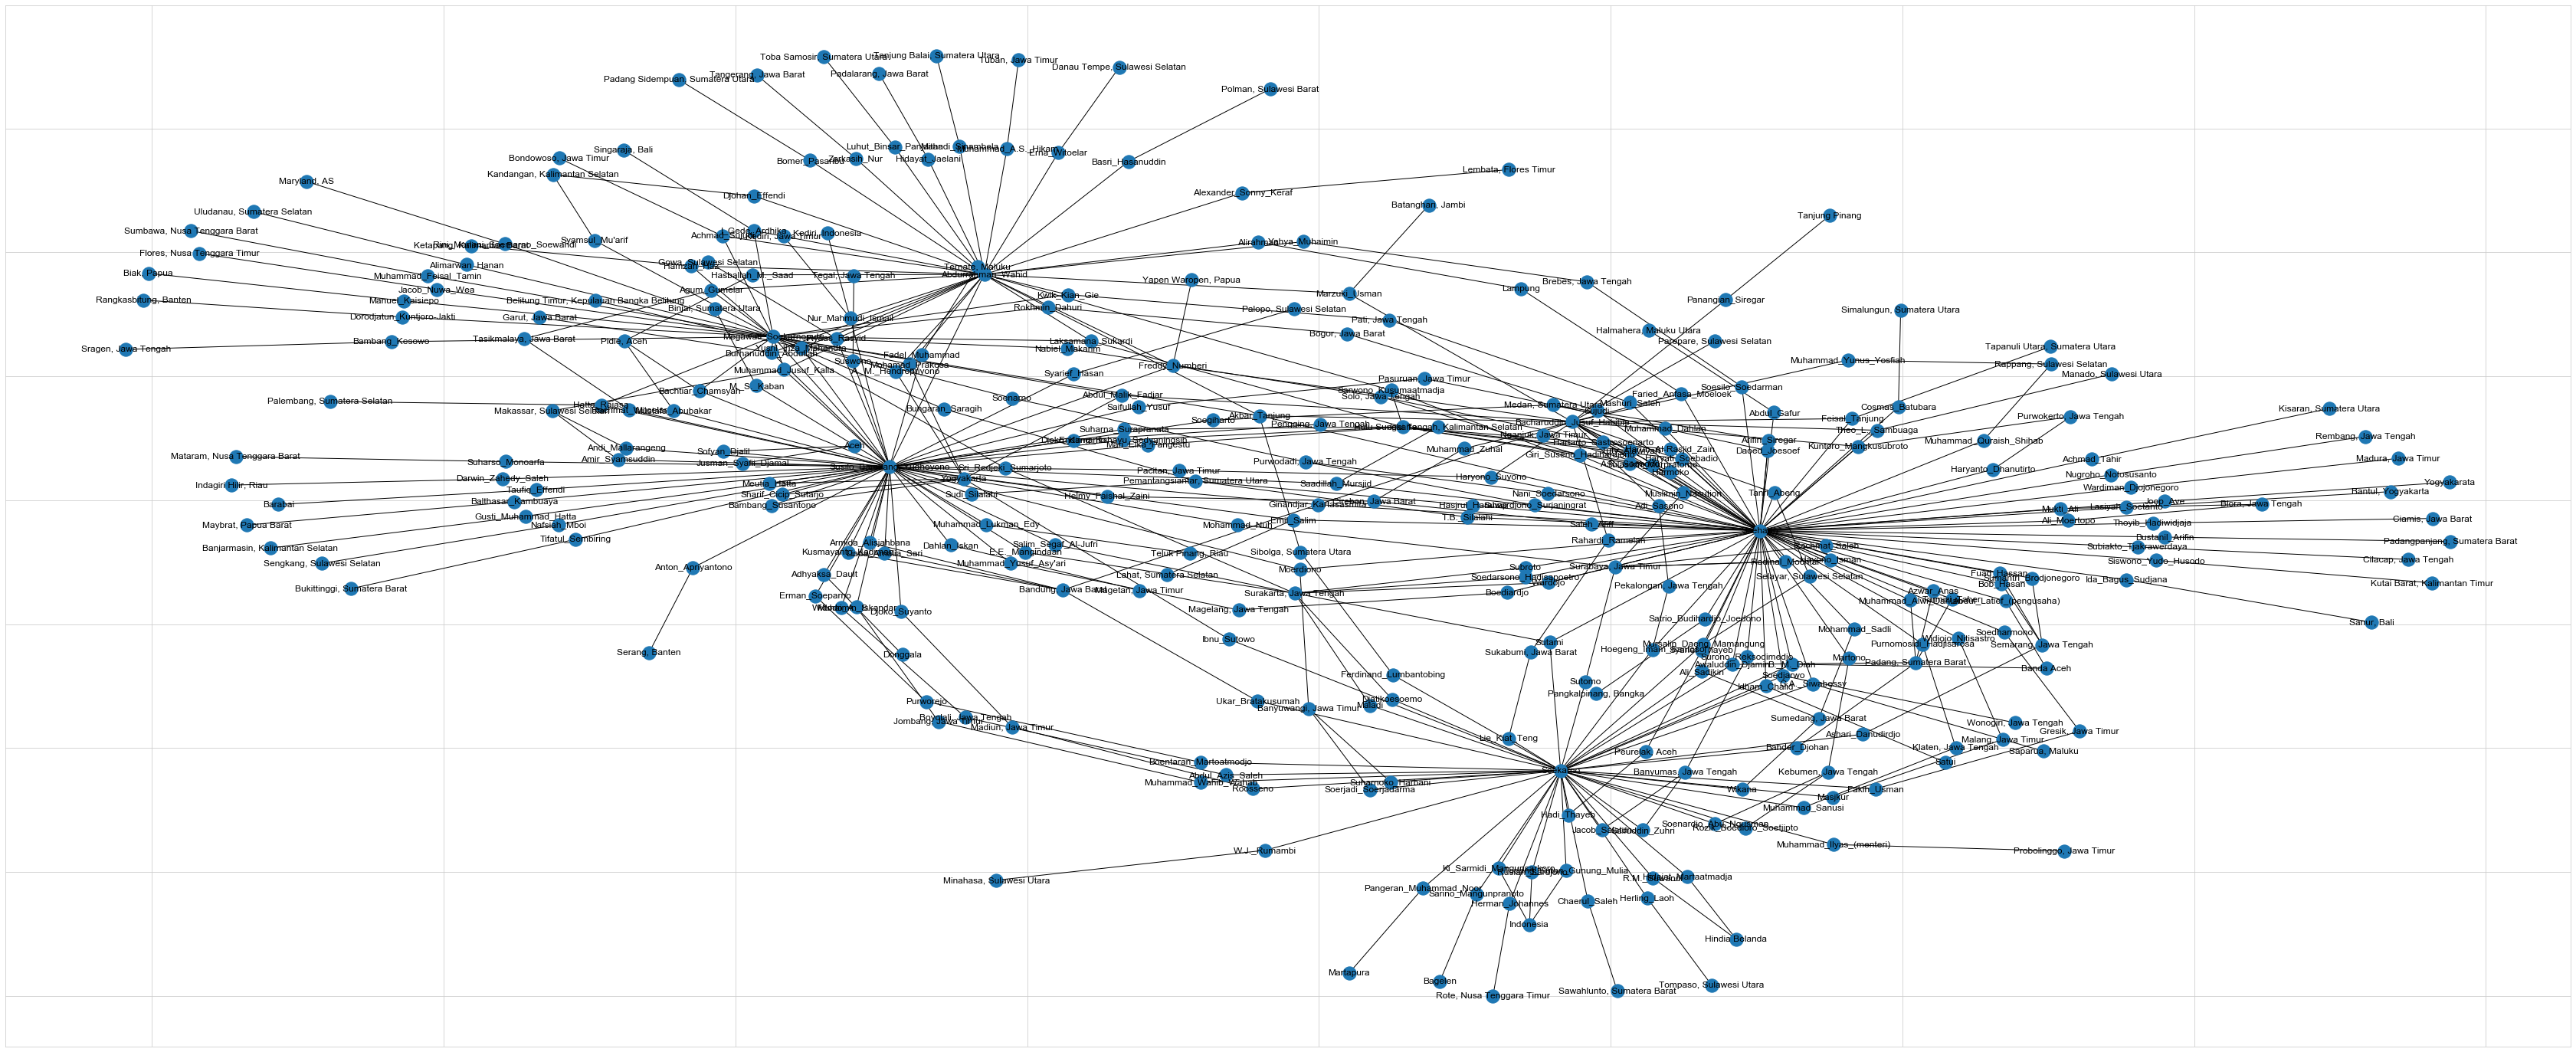

In [9]:
fig, ax = plt.subplots(figsize=(60,25))
layout = nx.spring_layout(g,iterations=50)
nx.draw_networkx_nodes(g, layout, ax = ax, labels=True)
nx.draw_networkx_edges(g, layout,  ax=ax)
_ = nx.draw_networkx_labels(g, layout, labels, ax=ax)

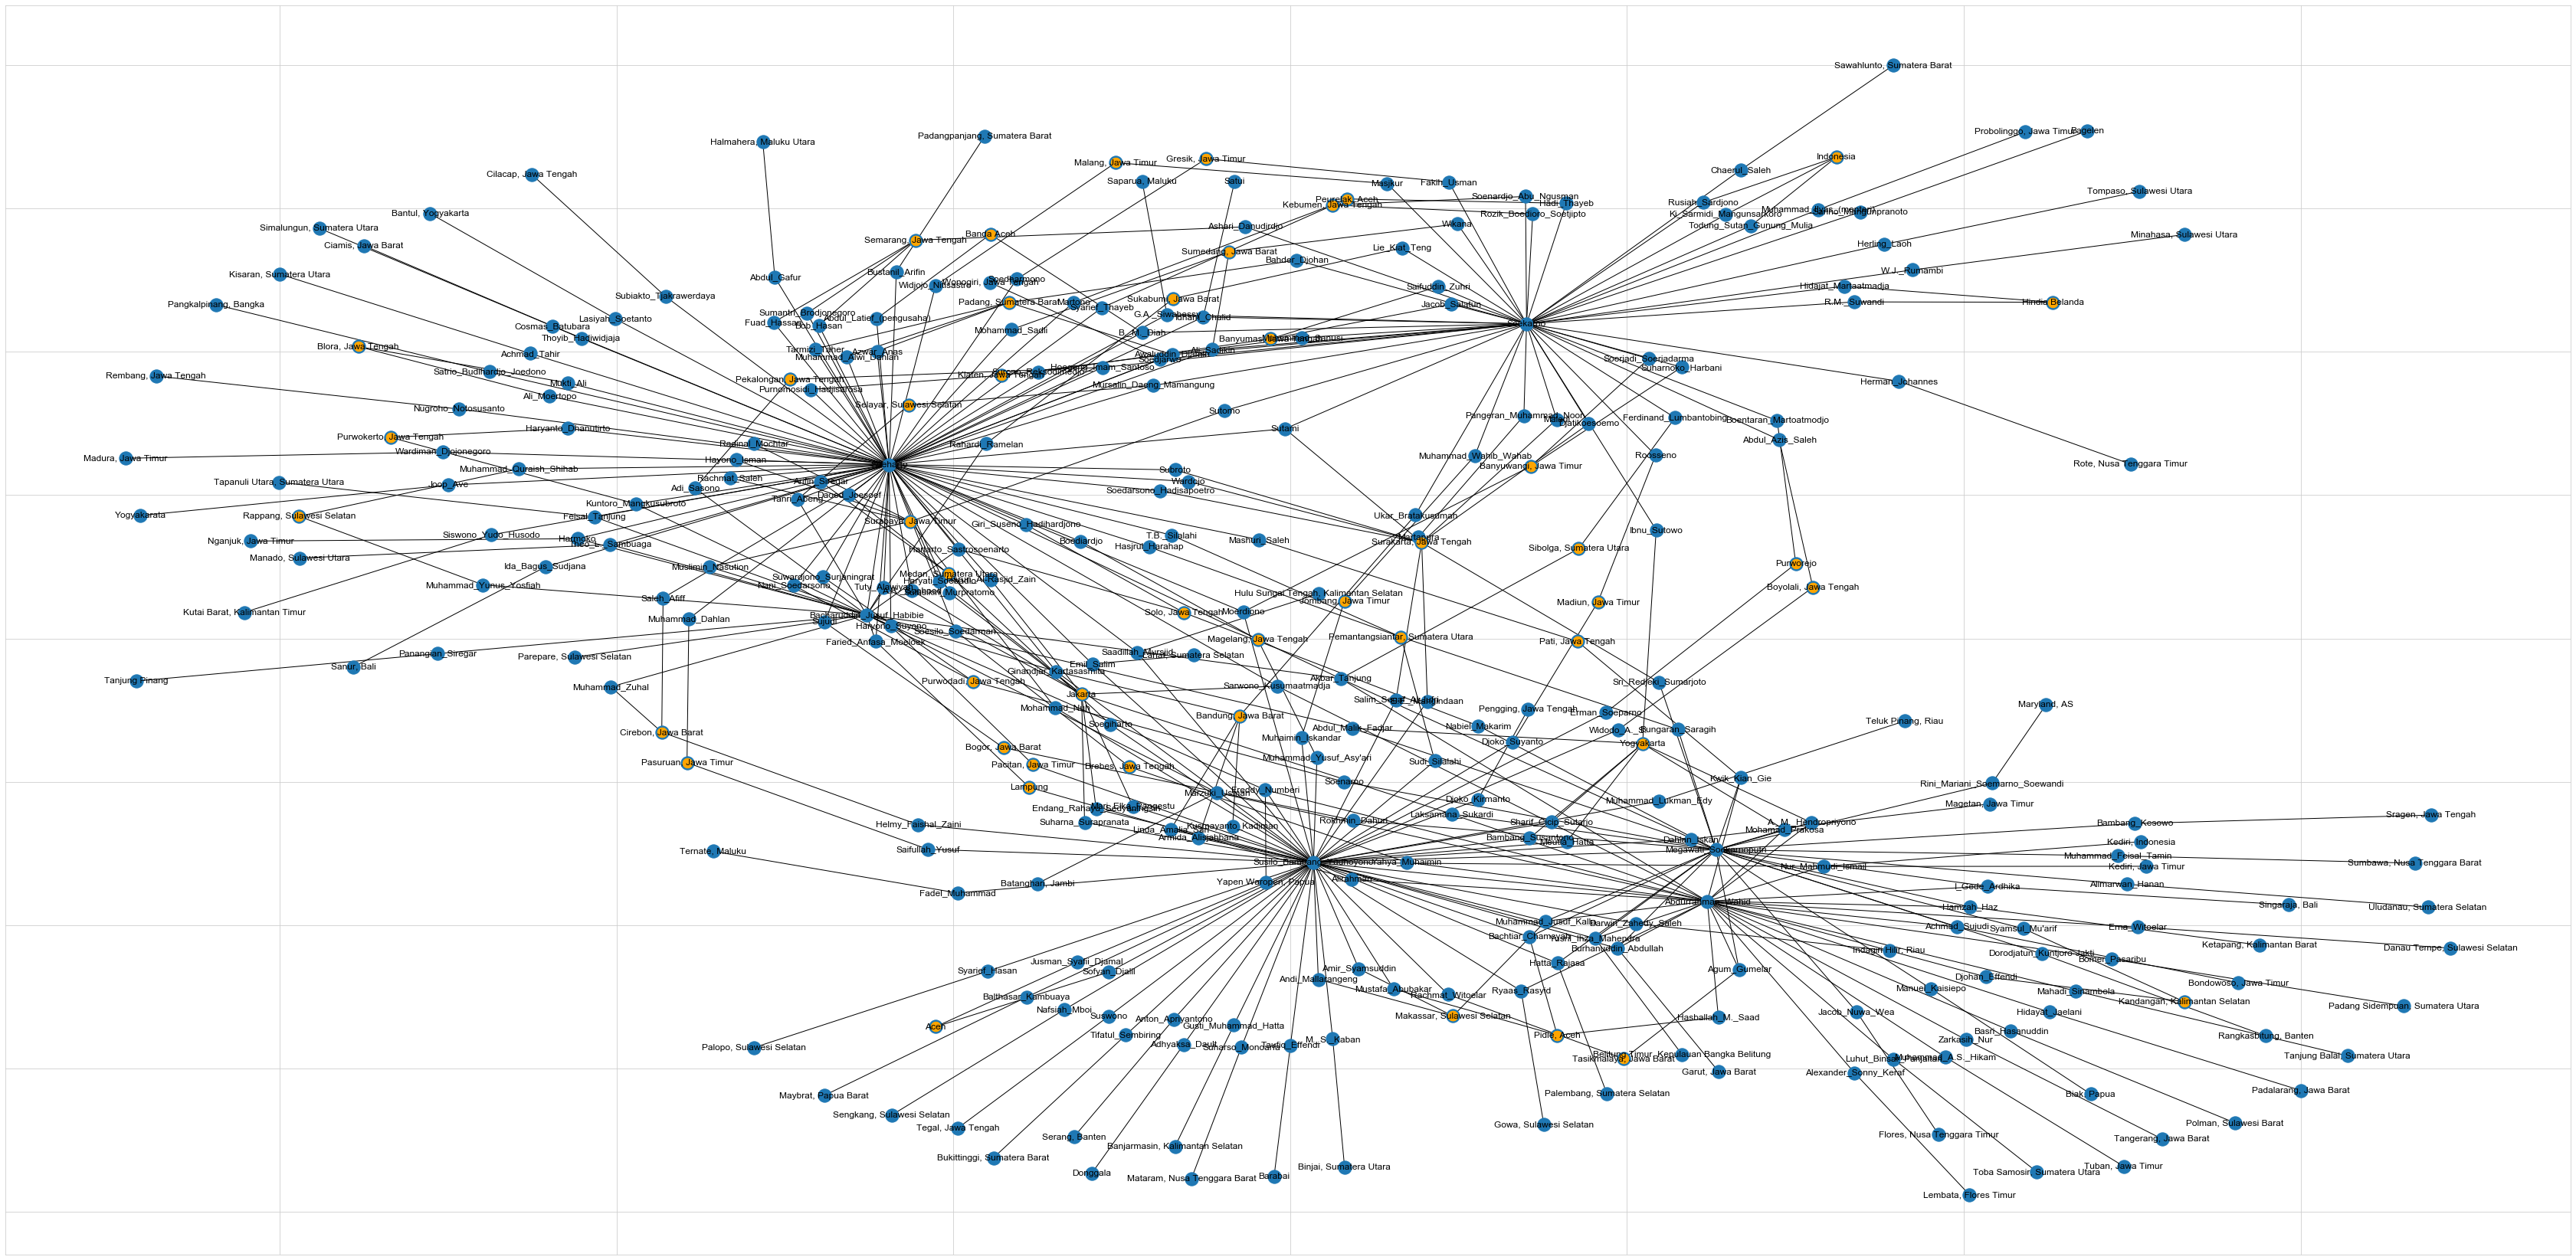

In [10]:
fig, ax = plt.subplots(figsize=(60,30))
layout = nx.spring_layout(g,iterations=50)
nx.draw_networkx_nodes(g, layout, ax = ax, lables=True)
nx.draw_networkx_edges(g, layout, ax=ax)
_ = nx.draw_networkx_labels(g, layout, labels, ax=ax)
asalbanyak = [asal for asal in df.Asal if g.degree(asal)>1]
nx.draw_networkx_nodes(g, layout, nodelist=asalbanyak, node_color='orange', node_size=150)

In [11]:
node2vec = Node2Vec(g, dimensions=20, walk_length=16,num_walks=100, workers=2)

Computing transition probabilities: 100%|██████████████████████████████████████████| 332/332 [00:00<00:00, 4620.44it/s]


In [12]:
model = node2vec.fit(window=10,min_count=1)

In [13]:
for node, _ in model.most_similar('Jakarta'):
    print(node)

A.R._Soehoed
Sulasikin_Murpratomo
Harun_Al-Rasjid_Zain
Mari_Elka_Pangestu
Suharna_Surapranata
Haryati_Soebadio
Endang_Rahayu_Sedyaningsih
Sarwono_Kusumaatmadja
Laksamana_Sukardi
Tuty_Alawiyah


C:\Users\LENOVO\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


In [14]:
nodementeri =[x for x in df.NamaMenteri]
nodementeri

['A._M._Hendropriyono',
 'Agum_Gumelar',
 'Freddy_Numberi',
 'Hasballah_M._Saad',
 'Susilo_Bambang_Yudhoyono',
 'Yusril_Ihza_Mahendra',
 'Nur_Mahmudi_Ismail',
 'Achmad_Sujudi',
 'Mohamad_Prakosa',
 'Bomer_Pasaribu',
 'Ryaas_Rasyid',
 'Luhut_Binsar_Panjaitan',
 'Yahya_Muhaimin',
 'Zarkasih_Nur',
 'Mahadi_Sinambela',
 'Alirahman',
 'Djohan_Effendi',
 'Muhammad_Yunus_Yosfiah',
 'A._M._Hendropriyono',
 'Agum_Gumelar',
 'Akbar_Tanjung',
 'Bachtiar_Chamsyah',
 'Dorodjatun_Kuntjoro-Jakti',
 'Hamzah_Haz',
 'Hatta_Rajasa',
 'I_Gede_Ardhika',
 'Muhammad_Jusuf_Kalla',
 'Kwik_Kian_Gie',
 'Nabiel_Makarim',
 'Susilo_Bambang_Yudhoyono',
 'Yusril_Ihza_Mahendra',
 'Burhanuddin_Abdullah',
 'Achmad_Sujudi',
 'Abdul_Malik_Fadjar',
 'Jacob_Nuwa_Wea',
 'Rini_Mariani_Soemarno_Soewandi',
 'Bungaran_Saragih',
 'Mohamad_Prakosa',
 'Soenarno',
 'Rokhmin_Dahuri',
 'Muhammad_Feisal_Tamin',
 'Manuel_Kaisiepo',
 "Syamsul_Mu'arif",
 'Laksamana_Sukardi',
 'Alimarwan_Hanan',
 'Sri_Redjeki_Sumarjoto',
 'Bambang_Kesowo',

In [15]:
embeddings = np.array([model.wv[x] for x in nodementeri])
embeddings

array([[ 0.63656634, -3.0897057 ,  0.11373679, ..., -1.3665341 ,
         0.03600312, -2.5504222 ],
       [ 4.235734  , -1.3847047 , -0.5428233 , ..., -1.229673  ,
         2.797027  , -0.8152669 ],
       [ 1.9881989 , -1.0749505 , -4.131187  , ...,  1.1386948 ,
         0.4335772 ,  1.2857155 ],
       ...,
       [ 4.3144217 , -3.1671703 , -4.169792  , ...,  3.8685017 ,
        -2.2687898 , -0.4101857 ],
       [-0.7320381 ,  1.3609707 ,  6.633014  , ...,  0.78693444,
        -4.3679237 , -3.3380268 ],
       [-1.5913755 ,  3.3789763 , -3.420048  , ..., -1.1401044 ,
        -3.1972976 , -1.9094688 ]], dtype=float32)

In [16]:
df.NamaPresiden

0      Abdurrahman_Wahid
1      Abdurrahman_Wahid
2      Abdurrahman_Wahid
3      Abdurrahman_Wahid
4      Abdurrahman_Wahid
             ...        
255    Abdurrahman_Wahid
256    Abdurrahman_Wahid
257    Abdurrahman_Wahid
258             Soekarno
259             Soekarno
Name: NamaPresiden, Length: 260, dtype: object

In [17]:
tsne = TSNE(n_components=2, random_state=7, perplexity=15)
embeddings_2d = tsne.fit_transform(embeddings)

In [18]:
warna_presiden = {
    'Abdurrahman_Wahid':'lightblue',
    'Bacharuddin_Jusuf_Habibie': 'b',
    'Megawati_Soekarnoputri':'r',
    'Soeharto':'teal',
    'Susilo_Bambang_Yudhoyono':'y',
    'Soekarno':'g'}

df['color'] = df['NamaPresiden'].apply(lambda x:warna_presiden[x])
warna_menteri = dict(zip(df['NamaMenteri'],df['color']))
colors = [warna_menteri[x] for x in df.NamaMenteri]

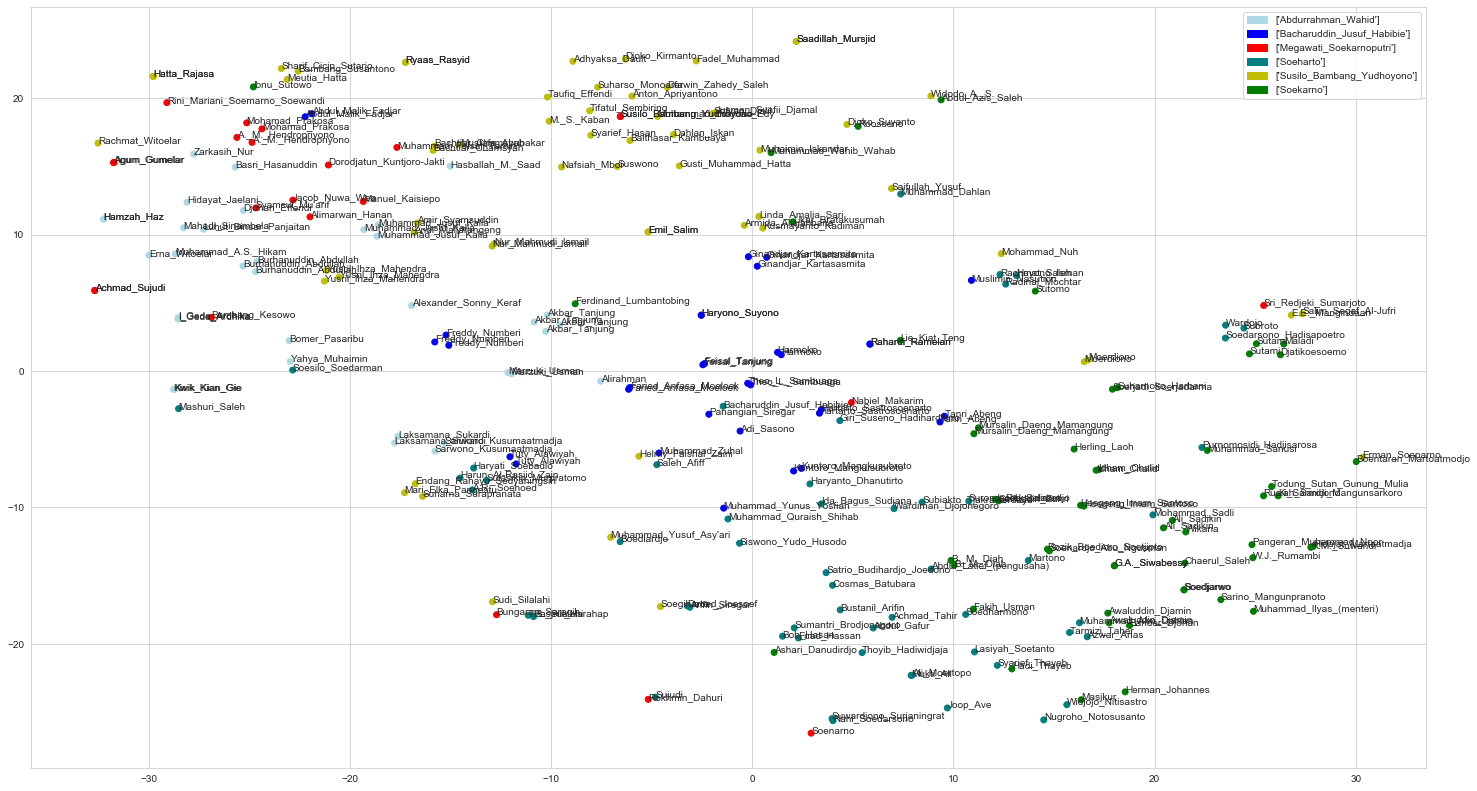

In [20]:
figure = plt.figure(figsize=(25,14))

ax = figure.add_subplot(111)

ax.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=colors)

i=0
for menterisaya in nodementeri:
    ax.annotate(menterisaya, (embeddings_2d[i,0], embeddings_2d[i,1]))
    i=i+1
    
presiden_legend = [mpatches.Patch(color=color, label=df.NamaPresiden.unique()) for df.NamaPresiden, color in warna_presiden.items()]
ax.legend(handles=presiden_legend);